# Spatial Functions - overlay operations

## Preparing the data

First we need to load all the data clean it up and create buffers.  There is nothing that we haven't seen in this code block. We are just accumulating it all in one place.

In [1]:
%matplotlib inline
import geopandas as gpd

# Read in all the raw data
buowl = gpd.read_file("data/BUOWL_Habitat.shp")
raptor = gpd.read_file("data/Raptor_Nests.shp")
linear = gpd.read_file("data/Linear_Projects.shp")
eagle = gpd.read_file("data/BAEA_Nests.shp")
counties = gpd.read_file("data/colorado_counties.shp", mask=eagle)

# Clean raptor data - get a subset that excludes 3 outlier points
raptor = raptor.cx[:-104.3, 39.5:40.6]

# Convert raw data to UTM NAD83/Zone 13 CRS (EPSG:26913)
buowl.to_crs(epsg=26913, inplace=True)
raptor.to_crs(epsg=26913, inplace=True)
linear.to_crs(epsg=26913, inplace=True)
eagle.to_crs(epsg=26913, inplace=True)
counties.to_crs(epsg=26913, inplace=True)

# Clean raptor data - relace coded field values
raptor['recentspec'] = raptor['recentspec'].str.replace('SWHA', 'Swainsons Hawk')
raptor['recentspec'] = raptor['recentspec'].str.replace('RTHA', 'Red-tail Hawk')
print("recentspec values = {}".format(raptor['recentspec'].unique()))

# add buff_dist field to raptors GeoDataFrame
species_buffer = {"Swainsons Hawk":333, "Red-tail Hawk":667, "Northern Harrier":500}
raptor['buf_dist']=raptor['recentspec'].map(species_buffer)

# add length field to linears GeoDataFrame
linear['length_m'] = linear['geometry'].length

# Create buffers
eagle['buffer'] = eagle['geometry'].buffer(804.5)
buowl['buffer'] = buowl['geometry'].buffer(300)
linear['buffer'] = linear['geometry'].buffer(linear['row_width'])
raptor['buffer'] = raptor['geometry'].buffer(raptor['buf_dist'])
                                 
eagle.set_geometry('buffer', inplace=True)
buowl.set_geometry('buffer', inplace=True)
linear.set_geometry('buffer', inplace=True)
raptor.set_geometry('buffer', inplace=True)

recentspec values = ['Swainsons Hawk' 'Red-tail Hawk' 'Northern Harrier']


In [2]:
raptor

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry,buf_dist,buffer
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (517341.522 4460953.719),333,"POLYGON ((517674.522 4460953.719, 517672.919 4..."
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (517955.324 4452295.260),333,"POLYGON ((518288.324 4452295.260, 518286.721 4..."
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (512832.261 4466854.171),333,"POLYGON ((513165.261 4466854.171, 513163.658 4..."
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (521736.624 4448400.393),333,"POLYGON ((522069.624 4448400.393, 522068.020 4..."
5,4.0,40.217638,-104.779386,2011-01-06,Red-tail Hawk,FLEDGED NEST,4,POINT (517064.285 4445215.102),667,"POLYGON ((517731.285 4445215.102, 517728.073 4..."
...,...,...,...,...,...,...,...,...,...,...
874,911.0,40.006950,-104.894370,2015-08-18,Red-tail Hawk,INACTIVE NEST,911,POINT (501370.881 4428086.730),667,"POLYGON ((502037.881 4428086.730, 502034.669 4..."
875,912.0,39.998876,-104.900128,2015-09-01,Red-tail Hawk,INACTIVE NEST,912,POINT (513009.440 4424410.603),667,"POLYGON ((513676.440 4424410.603, 513673.229 4..."
876,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,9991,POINT (504219.463 4454875.391),500,"POLYGON ((504719.463 4454875.391, 504717.056 4..."
877,NaN,NaN,NaN,2020-05-05,Swainsons Hawk,INACTIVE NEST,1001,POINT (504676.732 4454887.748),333,"POLYGON ((505009.732 4454887.748, 505008.128 4..."


## Simple plotting of more than 1 GeoDataFrame

So far we have done some simple plotting but only of a single GeoDataFrame.  Here we will expand this to include maps with more than one GeoDataFrame.

As a result we will also be more specific about which colors we will use.

The key is that calling the plot function has a return value and we can use that return value to use as the basemap in the next call to the plot method using the ax parameter


C:\Anaconda\lib\site-packages\shapely\predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


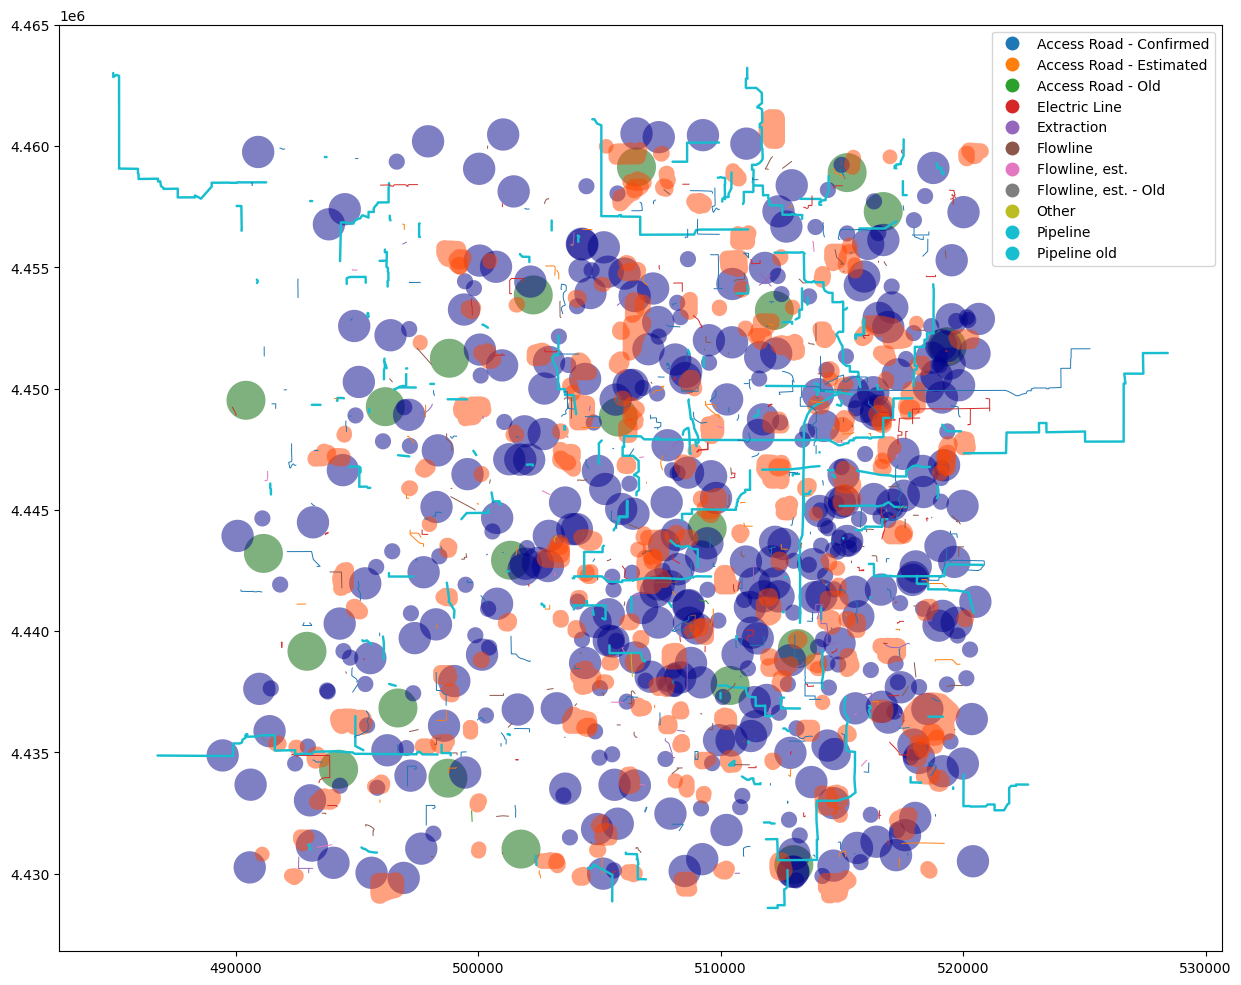

In [3]:
basemap = eagle.cx[490000:520000, 4430000:4460000].plot(color='darkgreen', alpha = 0.5, figsize=(15, 15))
basemap = raptor.cx[490000:520000, 4430000:4460000].plot(ax=basemap, color='darkblue', alpha = 0.5)
basemap = buowl.cx[490000:520000, 4430000:4460000].plot(ax=basemap, color='orangered', alpha = 0.5)
basemap = linear.cx[490000:520000, 4430000:4460000].plot(ax=basemap, cmap='tab10', column='type', legend=True)

In [4]:
linear.cx[490000:520000, 4430000:4460000].sort_values('length_m', ascending=False).head()

C:\Anaconda\lib\site-packages\shapely\predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


,postgis_fi,type,row_width,Project,geometry,length_m,buffer
299,295,Access Road - Confirmed,20.0,295,"LINESTRING (525231.405 4451647.877, 524451.963...",17113.355664,"POLYGON ((513275.114 4449272.162, 513274.167 4..."
300,296,Pipeline,50.0,296,"LINESTRING (506528.336 4445607.164, 506529.077...",17105.892046,"POLYGON ((505926.201 4447206.342, 505924.749 4..."
99,87,Pipeline,50.0,87,"LINESTRING (520031.747 4447340.131, 521767.739...",14108.343669,"POLYGON ((521719.034 4447399.107, 521740.018 4..."
638,636,Pipeline,50.0,636,"LINESTRING (498323.468 4434917.145, 497700.077...",13382.066319,"POLYGON ((490455.076 4435602.883, 490454.909 4..."
258,254,Pipeline,50.0,254,"LINESTRING (484951.194 4463017.764, 484951.719...",11924.202196,"POLYGON ((485001.415 4462949.713, 485049.615 4..."


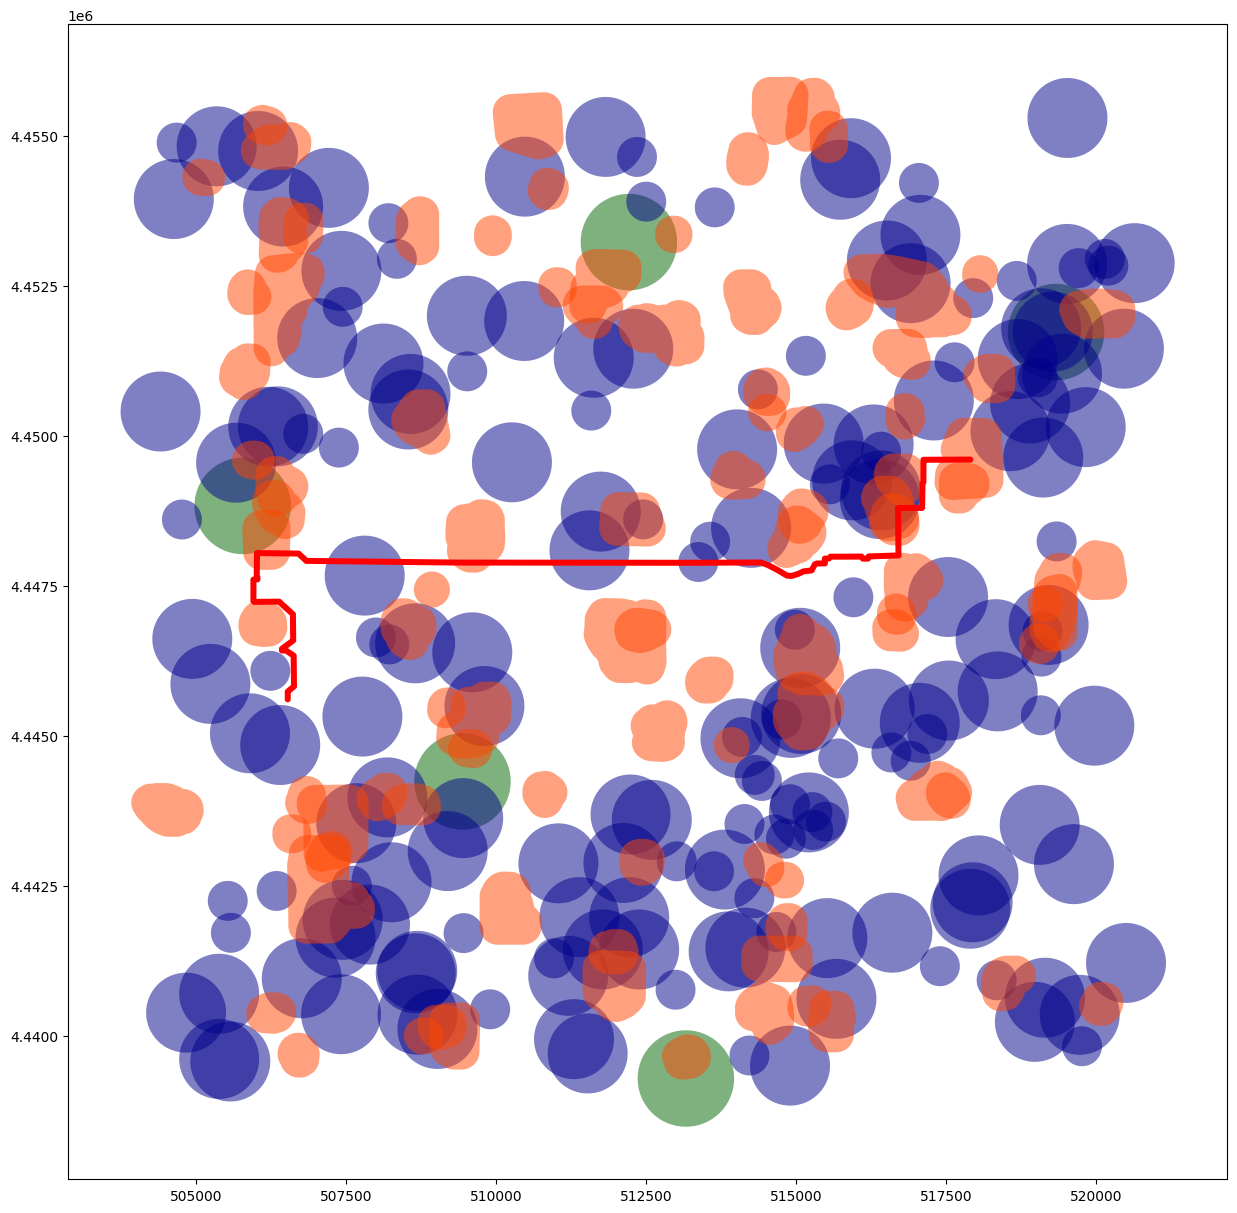

In [5]:
basemap = eagle.cx[505000:520000, 4440000:4455000].plot(color='darkgreen', alpha = 0.5, figsize=(15, 15))
basemap = raptor.cx[505000:520000, 4440000:4455000].plot(ax=basemap, color='darkblue', alpha = 0.5)
basemap = buowl.cx[505000:520000, 4440000:4455000].plot(ax=basemap, color='orangered', alpha = 0.5)
basemap = linear[linear['Project']==296].plot(ax=basemap, color='red')

## Different uses of intersection

### intersects - spatial predicate

Spatial predicates return true or false depending if the relationship is true.

The following code cell returns the raptor nests whose buffers intersect the row for linear project 296.

In [6]:
linear_296 = linear[linear['Project']==296].unary_union
impacted_raptors = raptor[raptor['buffer'].intersects(linear_296)]
impacted_raptors

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry,buf_dist,buffer
146,140.0,40.168164,-104.889043,2009-09-21,Red-tail Hawk,ACTIVE NEST,140,POINT (514252.859 4448465.844),667,"POLYGON ((514919.859 4448465.844, 514916.648 4..."
397,402.0,40.203174,-104.808378,2012-04-24,Red-tail Hawk,ACTIVE NEST,402,POINT (516398.732 4448946.352),667,"POLYGON ((517065.732 4448946.352, 517062.520 4..."
410,415.0,40.220341,-104.897814,2014-07-23,Red-tail Hawk,ACTIVE NEST,415,POINT (511558.303 4448090.533),667,"POLYGON ((512225.303 4448090.533, 512222.091 4..."
563,579.0,40.176497,-104.753992,2008-06-03,Swainsons Hawk,ACTIVE NEST,579,POINT (513570.552 4448234.833),333,"POLYGON ((513903.552 4448234.833, 513901.949 4..."
610,643.0,40.119125,-104.867317,2014-03-14,Swainsons Hawk,ACTIVE NEST,643,POINT (513373.650 4447895.952),333,"POLYGON ((513706.650 4447895.952, 513705.046 4..."
814,851.0,40.145773,-104.841214,2015-06-12,Red-tail Hawk,FLEDGED NEST,851,POINT (507811.257 4447669.519),667,"POLYGON ((508478.257 4447669.519, 508475.045 4..."
830,867.0,40.154771,-104.832801,2015-05-13,Red-tail Hawk,ACTIVE NEST,867,POINT (516417.148 4449089.574),667,"POLYGON ((517084.148 4449089.574, 517080.936 4..."


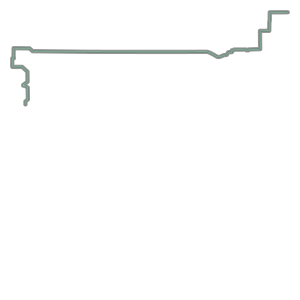

In [7]:
linear_296

### intersection - spatial operation

Returns the intersection of two geometries as a geometry.


In [8]:
impacted_raptors = impacted_raptors.copy()
impacted_raptors['impacted_poly']=impacted_raptors['buffer'].intersection(linear_296)
impacted_raptors['impacted_area']=impacted_raptors['impacted_poly'].area/10000
impacted_raptors

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry,buf_dist,buffer,impacted_poly,impacted_area
146,140.0,40.168164,-104.889043,2009-09-21,Red-tail Hawk,ACTIVE NEST,140,POINT (514252.859 4448465.844),667,"POLYGON ((514919.859 4448465.844, 514916.648 4...","POLYGON ((514567.281 4447877.602, 514508.109 4...",5.879832
397,402.0,40.203174,-104.808378,2012-04-24,Red-tail Hawk,ACTIVE NEST,402,POINT (516398.732 4448946.352),667,"POLYGON ((517065.732 4448946.352, 517062.520 4...","POLYGON ((517062.520 4448880.975, 517052.916 4...",7.929815
410,415.0,40.220341,-104.897814,2014-07-23,Red-tail Hawk,ACTIVE NEST,415,POINT (511558.303 4448090.533),667,"POLYGON ((512225.303 4448090.533, 512222.091 4...","POLYGON ((512196.582 4447896.913, 512174.531 4...",12.663280
563,579.0,40.176497,-104.753992,2008-06-03,Swainsons Hawk,ACTIVE NEST,579,POINT (513570.552 4448234.833),333,"POLYGON ((513903.552 4448234.833, 513901.949 4...","POLYGON ((513697.986 4447927.181, 513667.217 4...",0.634405
610,643.0,40.119125,-104.867317,2014-03-14,Swainsons Hawk,ACTIVE NEST,643,POINT (513373.650 4447895.952),333,"POLYGON ((513706.650 4447895.952, 513705.046 4...","POLYGON ((513705.046 4447863.312, 513700.891 4...",6.625508
814,851.0,40.145773,-104.841214,2015-06-12,Red-tail Hawk,FLEDGED NEST,851,POINT (507811.257 4447669.519),667,"POLYGON ((508478.257 4447669.519, 508475.045 4...","POLYGON ((507172.978 4447863.139, 507195.029 4...",12.461285
830,867.0,40.154771,-104.832801,2015-05-13,Red-tail Hawk,ACTIVE NEST,867,POINT (516417.148 4449089.574),667,"POLYGON ((517084.148 4449089.574, 517080.936 4...","MULTIPOLYGON (((517080.936 4449024.197, 517071...",6.738611


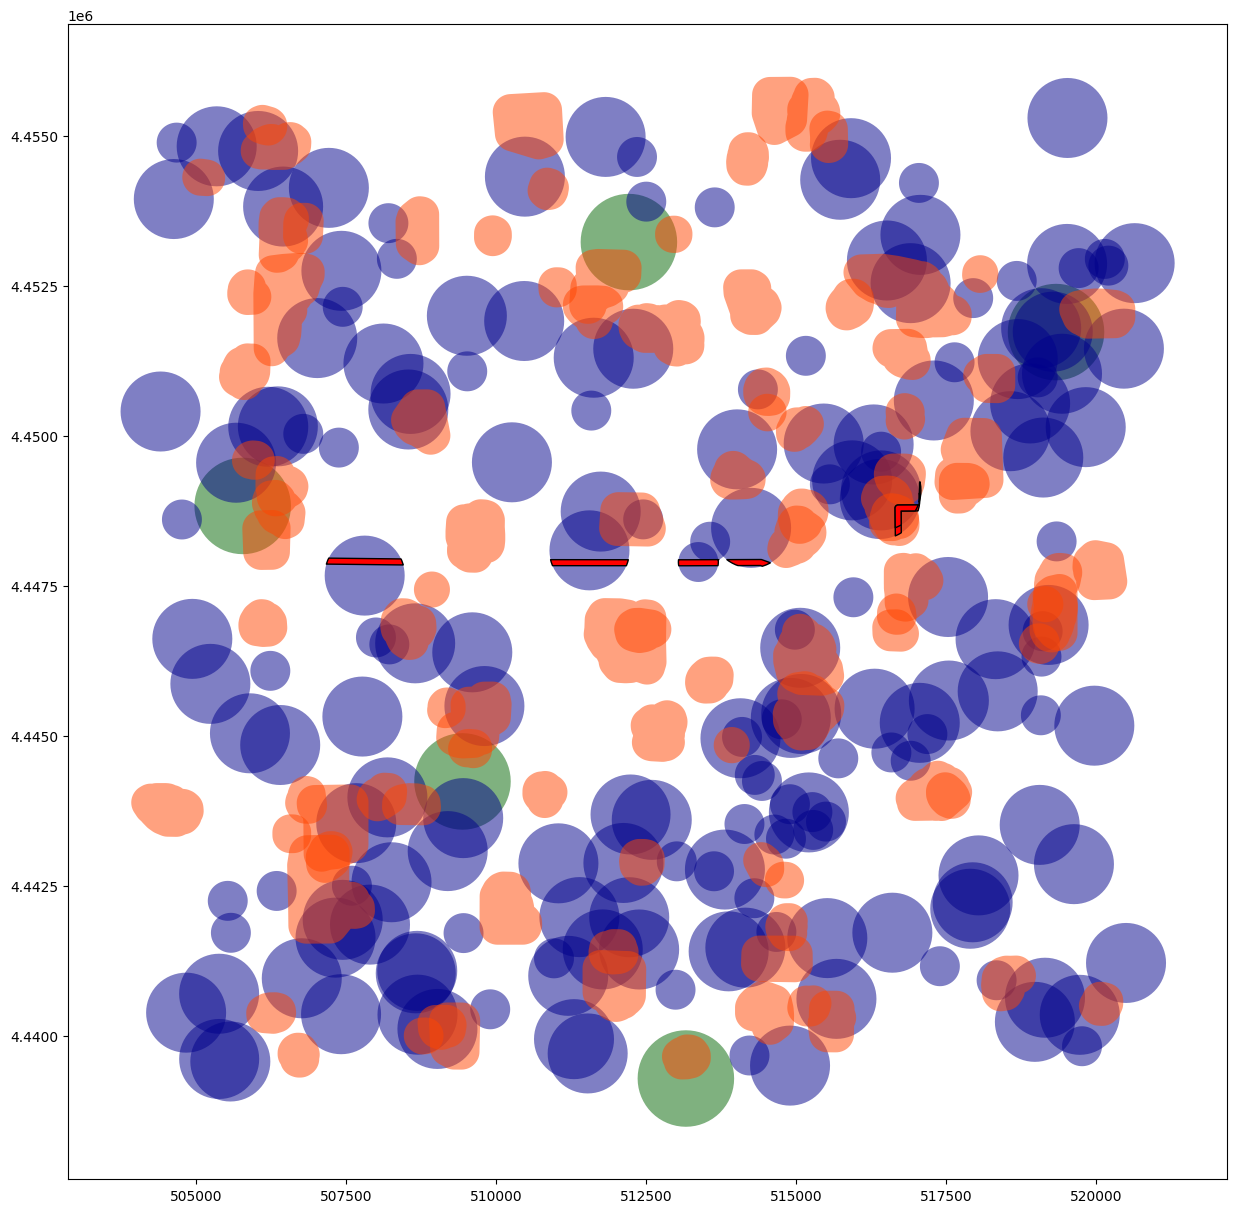

In [9]:
basemap = eagle.cx[505000:520000, 4440000:4455000].plot(color='darkgreen', alpha = 0.5, figsize=(15, 15))
basemap = raptor.cx[505000:520000, 4440000:4455000].plot(ax=basemap, color='darkblue', alpha = 0.5)
basemap = buowl.cx[505000:520000, 4440000:4455000].plot(ax=basemap, color='orangered', alpha = 0.5)
basemap = impacted_raptors.set_geometry('impacted_poly').plot(ax=basemap, color='red', edgecolor='k')

In [10]:
impacted_raptors[impacted_raptors['recentstat']=='ACTIVE NEST']['impacted_area'].max()

12.663279741425235

### Overlay method with how='intersection'

This is the traditional intersection operation from desktop GIS. It creates an entirely new dataset with a new feature for every combination of raptor buffer and linear buffer.  Each feature will have ALL the fields from both layers.

In [11]:
raptor_intersection = gpd.overlay(raptor, linear, how='intersection')
raptor_intersection['area_ha'] = raptor_intersection['geometry'].area/10000
raptor_intersection

,postgis_fi_1,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry_1,buf_dist,postgis_fi_2,type,row_width,Project,geometry_2,length_m,geometry,area_ha
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (517341.522 4460953.719),333,1003,Pipeline,50.0,1003,"LINESTRING (517011.998 4461606.739, 517012.890...",1359.174276,"POLYGON ((517244.858 4460635.058, 517214.089 4...",5.265378
1,219.0,40.247995,-104.709889,2011-04-06,Red-tail Hawk,INACTIVE NEST,219,POINT (516872.918 4461478.780),667,1003,Pipeline,50.0,1003,"LINESTRING (517011.998 4461606.739, 517012.890...",1359.174276,"POLYGON ((517128.168 4460862.553, 517066.538 4...",8.067819
2,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (517955.324 4452295.260),333,977,Flowline,20.0,977,"LINESTRING (518143.078 4452413.362, 518415.345...",272.268063,"POLYGON ((518262.976 4452422.693, 518273.548 4...",0.555340
3,511.0,40.181594,-104.734128,2013-06-05,Swainsons Hawk,ACTIVE NEST,511,POINT (518681.238 4452582.276),333,977,Flowline,20.0,977,"LINESTRING (518143.078 4452413.362, 518415.345...",272.268063,"POLYGON ((518404.358 4452397.271, 518387.558 4...",0.143753
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (521736.624 4448400.393),333,87,Pipeline,50.0,87,"LINESTRING (520031.747 4447340.131, 521767.739...",14108.343669,"POLYGON ((522030.303 4448243.418, 522013.503 4...",3.205512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,906.0,40.051193,-104.794308,2015-08-17,Red-tail Hawk,INACTIVE NEST,906,POINT (520354.888 4436377.084),667,1049,"Flowline, est.",20.0,1049,"LINESTRING (519711.019 4436426.443, 519776.278...",187.997978,"POLYGON ((519795.625 4436255.205, 519796.029 4...",0.877454
843,907.0,39.995541,-104.891149,2015-08-18,Red-tail Hawk,INACTIVE NEST,907,POINT (515620.892 4431063.820),667,415,Access Road - Confirmed,20.0,415,"LINESTRING (514945.245 4431008.078, 514946.393...",385.640073,"POLYGON ((514957.104 4430998.442, 514953.892 4...",0.157247
844,907.0,39.995541,-104.891149,2015-08-18,Red-tail Hawk,INACTIVE NEST,907,POINT (515620.892 4431063.820),667,591,Access Road - Confirmed,20.0,591,"LINESTRING (515526.716 4430802.799, 515526.651...",32.187286,"POLYGON ((515506.743 4430836.905, 515507.027 4...",0.254211
845,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,9991,POINT (504219.463 4454875.391),500,468,Access Road - Confirmed,20.0,468,"LINESTRING (504511.448 4454687.201, 504428.949...",83.107770,"POLYGON ((504429.407 4454657.168, 504427.445 4...",0.457893


In [12]:
raptor = raptor[['Nest_ID', 'recentstat', 'recentspec', 'buffer']]
raptor

,Nest_ID,recentstat,recentspec,buffer
0,361,INACTIVE NEST,Swainsons Hawk,"POLYGON ((517674.522 4460953.719, 517672.919 4..."
1,362,INACTIVE NEST,Swainsons Hawk,"POLYGON ((518288.324 4452295.260, 518286.721 4..."
3,2,INACTIVE NEST,Swainsons Hawk,"POLYGON ((513165.261 4466854.171, 513163.658 4..."
4,3,ACTIVE NEST,Swainsons Hawk,"POLYGON ((522069.624 4448400.393, 522068.020 4..."
5,4,FLEDGED NEST,Red-tail Hawk,"POLYGON ((517731.285 4445215.102, 517728.073 4..."
...,...,...,...,...
874,911,INACTIVE NEST,Red-tail Hawk,"POLYGON ((502037.881 4428086.730, 502034.669 4..."
875,912,INACTIVE NEST,Red-tail Hawk,"POLYGON ((513676.440 4424410.603, 513673.229 4..."
876,9991,INACTIVE NEST,Northern Harrier,"POLYGON ((504719.463 4454875.391, 504717.056 4..."
877,1001,INACTIVE NEST,Swainsons Hawk,"POLYGON ((505009.732 4454887.748, 505008.128 4..."


In [13]:
linear = linear[['Project', 'type', 'length_m', 'buffer']]
linear

,Project,type,length_m,buffer
0,50,Flowline,61.493007,"POLYGON ((534282.759 4449186.104, 534284.224 4..."
1,67,Pipeline,1598.899548,"POLYGON ((494910.422 4435224.098, 494906.185 4..."
2,68,Pipeline,944.785359,"POLYGON ((496158.060 4439538.863, 496158.552 4..."
3,69,Flowline,258.978327,"POLYGON ((513680.133 4451874.042, 513842.445 4..."
4,70,Flowline,254.149412,"POLYGON ((519395.343 4451097.598, 519396.886 4..."
...,...,...,...,...
1104,1105,Flowline,110.625879,"POLYGON ((520095.677 4437109.878, 520096.992 4..."
1105,1106,Pipeline,5980.267782,"POLYGON ((509009.166 4442215.418, 508420.741 4..."
1106,1107,Pipeline,5652.843524,"POLYGON ((516316.856 4442824.934, 516321.702 4..."
1107,1108,Pipeline,39.213896,"POLYGON ((512561.714 4440735.479, 512556.821 4..."


In [14]:
raptor_intersection = gpd.overlay(raptor, linear, how='intersection')
raptor_intersection['area_ha'] = raptor_intersection['geometry'].area/10000
raptor_intersection

,Nest_ID,recentstat,recentspec,Project,type,length_m,geometry,area_ha
0,361,INACTIVE NEST,Swainsons Hawk,1003,Pipeline,1359.174276,"POLYGON ((517244.858 4460635.058, 517214.089 4...",5.265378
1,219,INACTIVE NEST,Red-tail Hawk,1003,Pipeline,1359.174276,"POLYGON ((517128.168 4460862.553, 517066.538 4...",8.067819
2,362,INACTIVE NEST,Swainsons Hawk,977,Flowline,272.268063,"POLYGON ((518262.976 4452422.693, 518273.548 4...",0.555340
3,511,ACTIVE NEST,Swainsons Hawk,977,Flowline,272.268063,"POLYGON ((518404.358 4452397.271, 518387.558 4...",0.143753
4,3,ACTIVE NEST,Swainsons Hawk,87,Pipeline,14108.343669,"POLYGON ((522030.303 4448243.418, 522013.503 4...",3.205512
...,...,...,...,...,...,...,...,...
842,906,INACTIVE NEST,Red-tail Hawk,1049,"Flowline, est.",187.997978,"POLYGON ((519795.625 4436255.205, 519796.029 4...",0.877454
843,907,INACTIVE NEST,Red-tail Hawk,415,Access Road - Confirmed,385.640073,"POLYGON ((514957.104 4430998.442, 514953.892 4...",0.157247
844,907,INACTIVE NEST,Red-tail Hawk,591,Access Road - Confirmed,32.187286,"POLYGON ((515506.743 4430836.905, 515507.027 4...",0.254211
845,9991,INACTIVE NEST,Northern Harrier,468,Access Road - Confirmed,83.107770,"POLYGON ((504429.407 4454657.168, 504427.445 4...",0.457893


C:\Anaconda\lib\site-packages\shapely\predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


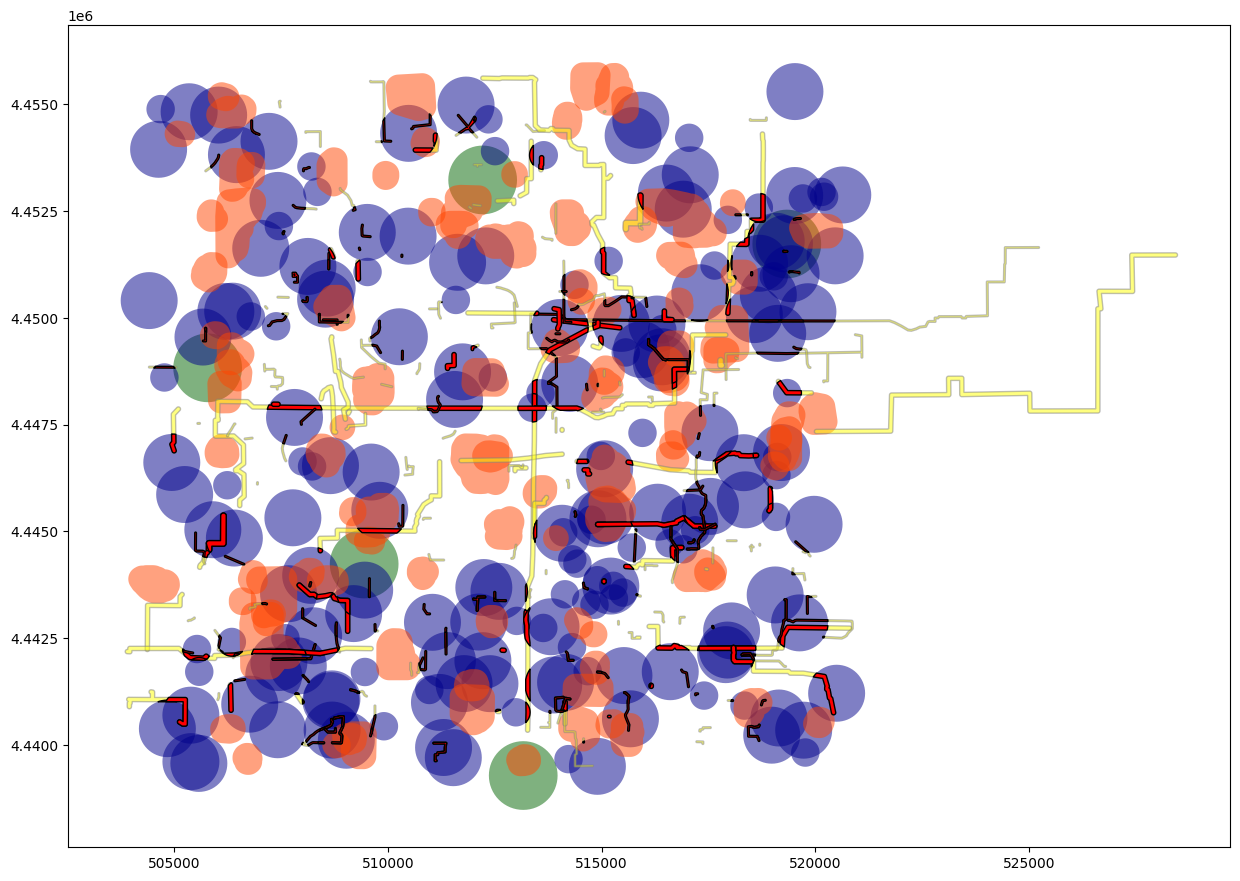

In [15]:
basemap = eagle.cx[505000:520000, 4440000:4455000].plot(color='darkgreen', alpha = 0.5, figsize=(15, 15))
basemap = raptor.cx[505000:520000, 4440000:4455000].plot(ax=basemap, color='darkblue', alpha = 0.5)
basemap = buowl.cx[505000:520000, 4440000:4455000].plot(ax=basemap, color='orangered', alpha = 0.5)
basemap = linear.cx[505000:520000, 4440000:4455000].plot(ax=basemap, color='yellow', alpha = 0.5, edgecolor='grey')
basemap = raptor_intersection.cx[505000:520000, 4440000:4455000].plot(ax=basemap, color='red', edgecolor='k')

### Intersections with different geometry types

Although intersections are generally thought of as relationships between two polygon geometries, they can also occur between geometries of different dimensions.  

In this case the order in which the GeoDataFrames are used on the overlay function is important.  The output geometry type will be the same as the first GeoDataFrame in the overlay function.

Consider if we want to perform an intersection with the raptor nest buffers and the linear features.  Not the buffers of the linear features that would return a row polygon and allow you to calculate how many hectares of the row was impacted by each raptor nest but rather an intersection of the raptor nest buffers and the actual lines.  This would allow you to answer questions such as how many meters of a pipeline are impacted.

We've already overwritten the raptor and linear geodataframes to include just a few select fields and the buffer geometry so we no longer have the actual linear geometry in the linear GeoDataFrame.  Lets run the first codecell in this notebook again to start from scratch.

In [16]:
linear

,Project,type,length_m,buffer
0,50,Flowline,61.493007,"POLYGON ((534282.759 4449186.104, 534284.224 4..."
1,67,Pipeline,1598.899548,"POLYGON ((494910.422 4435224.098, 494906.185 4..."
2,68,Pipeline,944.785359,"POLYGON ((496158.060 4439538.863, 496158.552 4..."
3,69,Flowline,258.978327,"POLYGON ((513680.133 4451874.042, 513842.445 4..."
4,70,Flowline,254.149412,"POLYGON ((519395.343 4451097.598, 519396.886 4..."
...,...,...,...,...
1104,1105,Flowline,110.625879,"POLYGON ((520095.677 4437109.878, 520096.992 4..."
1105,1106,Pipeline,5980.267782,"POLYGON ((509009.166 4442215.418, 508420.741 4..."
1106,1107,Pipeline,5652.843524,"POLYGON ((516316.856 4442824.934, 516321.702 4..."
1107,1108,Pipeline,39.213896,"POLYGON ((512561.714 4440735.479, 512556.821 4..."


Now lets run the code we ran above to generate an intersection but we will use the original linear geometry of the linear GeoDataFrame.

First lets select just the important columns from each GeoDataFrame

In [17]:
raptor = raptor[['Nest_ID', 'recentstat', 'recentspec', 'buffer']]
raptor

,Nest_ID,recentstat,recentspec,buffer
0,361,INACTIVE NEST,Swainsons Hawk,"POLYGON ((517674.522 4460953.719, 517672.919 4..."
1,362,INACTIVE NEST,Swainsons Hawk,"POLYGON ((518288.324 4452295.260, 518286.721 4..."
3,2,INACTIVE NEST,Swainsons Hawk,"POLYGON ((513165.261 4466854.171, 513163.658 4..."
4,3,ACTIVE NEST,Swainsons Hawk,"POLYGON ((522069.624 4448400.393, 522068.020 4..."
5,4,FLEDGED NEST,Red-tail Hawk,"POLYGON ((517731.285 4445215.102, 517728.073 4..."
...,...,...,...,...
874,911,INACTIVE NEST,Red-tail Hawk,"POLYGON ((502037.881 4428086.730, 502034.669 4..."
875,912,INACTIVE NEST,Red-tail Hawk,"POLYGON ((513676.440 4424410.603, 513673.229 4..."
876,9991,INACTIVE NEST,Northern Harrier,"POLYGON ((504719.463 4454875.391, 504717.056 4..."
877,1001,INACTIVE NEST,Swainsons Hawk,"POLYGON ((505009.732 4454887.748, 505008.128 4..."


In [18]:
linear = linear[['Project', 'type', 'length_m', 'geometry']]
linear

KeyError: "['geometry'] not in index"

This looks good but there is a problem.  Even though the linear GeoDataFrame has a GeoSeries it comes across as a pandas dataframe rather than a GeoPandas GeoDataFrame.  This caused a problem that I didn't see until I actually tried to do the intersection.

In [ ]:
linear.info()

Fortunately it is quite easy to convert a Pandas dataframe to a GeoPanda's GeoDataFrame.  You just pass it to the GeoDataFrame constrctor method. SInce it already has a GeoSeries we don't need to do anything else.

In [ ]:
linear = gpd.GeoDataFrame(linear)
linear.info()

In [ ]:
linear.cx[:,4400000:4480000].plot(figsize=(10,10))

In [ ]:
raptor_intersection_linear = gpd.overlay(linear, raptor, how='intersection')
raptor_intersection_linear['length_intersection'] = raptor_intersection_linear['geometry'].length
raptor_intersection_linear.sort_values('Project')

In [ ]:
basemap = eagle.cx[505000:520000, 4440000:4455000].plot(color='darkgreen', alpha = 0.5, figsize=(15, 15))
basemap = raptor.cx[505000:520000, 4440000:4455000].plot(ax=basemap, color='darkblue', alpha = 0.5)
basemap = buowl.cx[505000:520000, 4440000:4455000].plot(ax=basemap, color='orangered', alpha = 0.5)
basemap = linear.cx[505000:520000, 4440000:4455000].plot(ax=basemap, color='green', alpha = 0.5, edgecolor='grey')
basemap = raptor_intersection_linear.cx[505000:520000, 4440000:4455000].plot(ax=basemap, color='red', edgecolor='k')

In [ ]:
raptor_intersection.to_file('data/intersections.gpkg', layer='raptor_buffer', driver='GPKG')
raptor_intersection_linear.to_file('data/intersections.gpkg', layer='raptor_linear', driver='GPKG')

In [ ]:
import fiona
fiona.listlayers('data/intersections.gpkg')